In [10]:
import pandas as pd
import numpy as np
import geopandas as gpd
%matplotlib inline
import matplotlib.pyplot as plt

## Loading datasets

In [11]:
pgrounds = pd.read_csv("data/playgrounds.csv")
gspace = pd.read_csv("data/greenspaces_data.csv")
crime = pd.read_csv("data/crime_data.csv")

## Best Pittsburgh Neighborhood by number of playgrounds
### According to the code block below, Squirrel Hill South has the most number of playgrounds with a total number of 8. 

In [12]:
most_playgrounds = pgrounds[['neighborhood']].mode()
playground_count = pgrounds[['neighborhood']].value_counts()
# add bar graph 
print('The neighborhood with the most number of playgrounds is ' + most_playgrounds.to_string(index=False, header=False))
print('The total number of playgrounds is ' + str(playground_count[0]))

AttributeError: 'DataFrame' object has no attribute 'value_counts'

### When looking at the total number of playgrounds per neighborhood, it is especially apparent that Squirrel Hill South has a signficant lead.
#### (Neighborhoods with < 2 neighborhoods discarded from plot for clarity) 

In [8]:
playground_count[playground_count > 1].plot(kind='barh', figsize=(11,6))
plt.title("Neighborhoods by Total Number of Playgrounds")
plt.xlabel("Total Number of Playgrounds")

NameError: name 'playground_count' is not defined

### Now we know the answer, as to what the best Pittsburgh, PA neighborhood is in terms of playgrounds; but how can this finding be further emphasized? We believe that a geographic representation is most effective.

In [15]:
# converting latitude and longitude to x y coords
pgrounds_geo = gpd.GeoDataFrame(pgrounds, geometry=gpd.points_from_xy(pgrounds.longitude, pgrounds.latitude)) 

/Users/joel/miniforge3/envs/jupy/lib/python3.10/site-packages/geopandas/array.py:275: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  return GeometryArray(vectorized.points_from_xy(x, y, z), crs=crs)


In [13]:
 # loading in the shape file (contains the geometry needed to map our points to a meaningful coordinate system)
pittsburgh = gpd.read_file('data/Neighborhoods_.shp')

Text(0.5, 1.0, 'Pittsburgh Playgrounds')

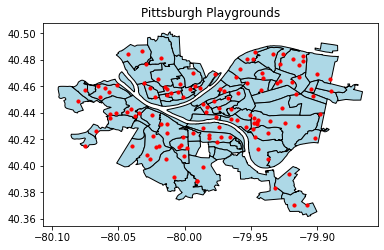

In [21]:
axis = pittsburgh.plot(color='lightblue', edgecolor='black')
pgrounds_geo.plot(ax=axis, color='red', figsize=(20,10), markersize=10)
plt.title('Pittsburgh Playgrounds')


### Final thoughts on the playground analysis
#### When considering the above analysis of ...

## Best Pittsburgh Neighborhood by Number of Green Spaces

### Green spaces can be defined as "an area of grass, trees, or other vegetation set apart for recreational or aesthetic purposes in an otherwise urban environment", including parks, but for the sake of this individual analysis we will not be including parks. Rather, we will consider empty land managed by Pittsburgh's Department of Public Works. It is no secret that air quality in Pittsburgh is low even after the deindustrialization of the 1970's. While parks and playgrounds are essential to neighborhoods, empty green spaces are important to consider as well because land set aside for vegetative growth helps absorb excess carbon dioxide while producing oxygen and improving storm water retention.

Text(0.5, 0, 'Total Green Spaces')

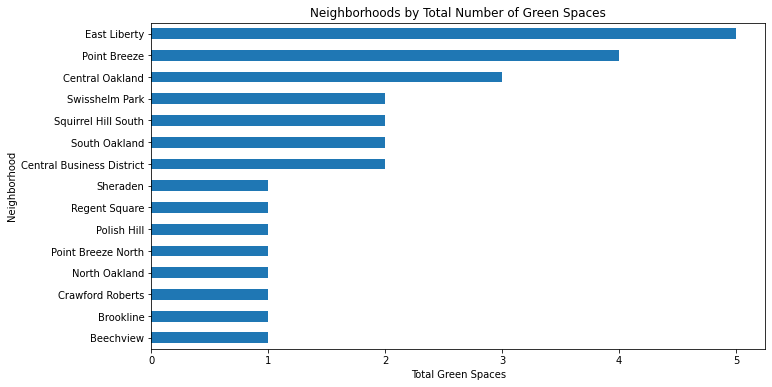

In [47]:
gspace.groupby('Neighborhood')["Total Acreage"].nunique().sort_values().plot(kind='barh', figsize=(11,6))
plt.title("Neighborhoods by Total Number of Green Spaces")
plt.xlabel("Total Green Spaces")

#### The above chart shows us that East Liberty has more green spaces than any other neighborhood in Pittsburgh.
#### Even though Point Breeze has more green spaces than Central Oakland, we will see below that Central Oakland has a greater total acreage than Point Breeze.
#### If we were to treat Oakland as a singular neighborhood, although it is not, we see that Oakland would have more green spaces than East Liberty.
#### However, it is important to consider that green spaces vary in size. Thus, the total amount of designated green spaces could be misleading. Below we will consider the amount of land designated as green space in acres.

Text(0.5, 0, 'Total Acreage')

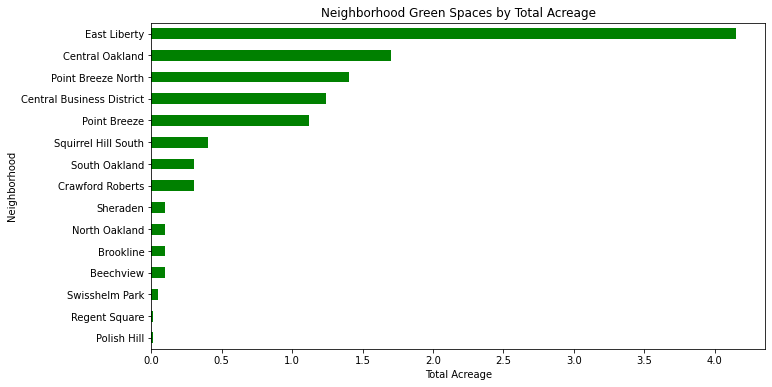

In [17]:
sorted = gspace.groupby('Neighborhood').agg(TotalAcreage = ('Total Acreage', 'sum')).sort_values(by='TotalAcreage').plot(kind='barh', legend=False, figsize=(11,6), color="green")
plt.title("Neighborhood Green Spaces by Total Acreage")
plt.xlabel("Total Acreage")

#### We can see via the above chart that East Liberty has over 4 acres of land dedicated to green spaces.
#### More than twice as much acreage than the neighborhood with the second most, Central Oakland. Even if we were to consider the Oakland neighborhoods to be a singular entity, we can see that East Liberty still has the largest amount of acreage.
#### And substantially more than the 0.1 acres of green space in Regent Square or Polish Hill.

### Winner by green space:
### East Liberty

## Best Pittsburgh Neighborhood by Number of Arrests:

#### Reported crime can be a very useful metric when considering the livability of an area. Here we can see the total number of arrests in each neighborhood of Pittsburgh.
#### It is important to note that total numbers can be misleading in statistics. It is safe to assume that our city's population is NOT evenly distributed across every neighborhood. Thus, arrests per capita is a more meaningful metric.
#### We should also consider that an individual arrested in a particular neighborhood does not indicate that they are a resident of that neighborhood.
#### However, for the sake of ease, we WILL consider total arrests as indicative of the relative safety of an area. It is also worth noting that not all crime is reported, not all criminal activity leads to an arrest, and not all arrests lead to convictions in court.

Text(0.5, 0, 'Total Arrests')

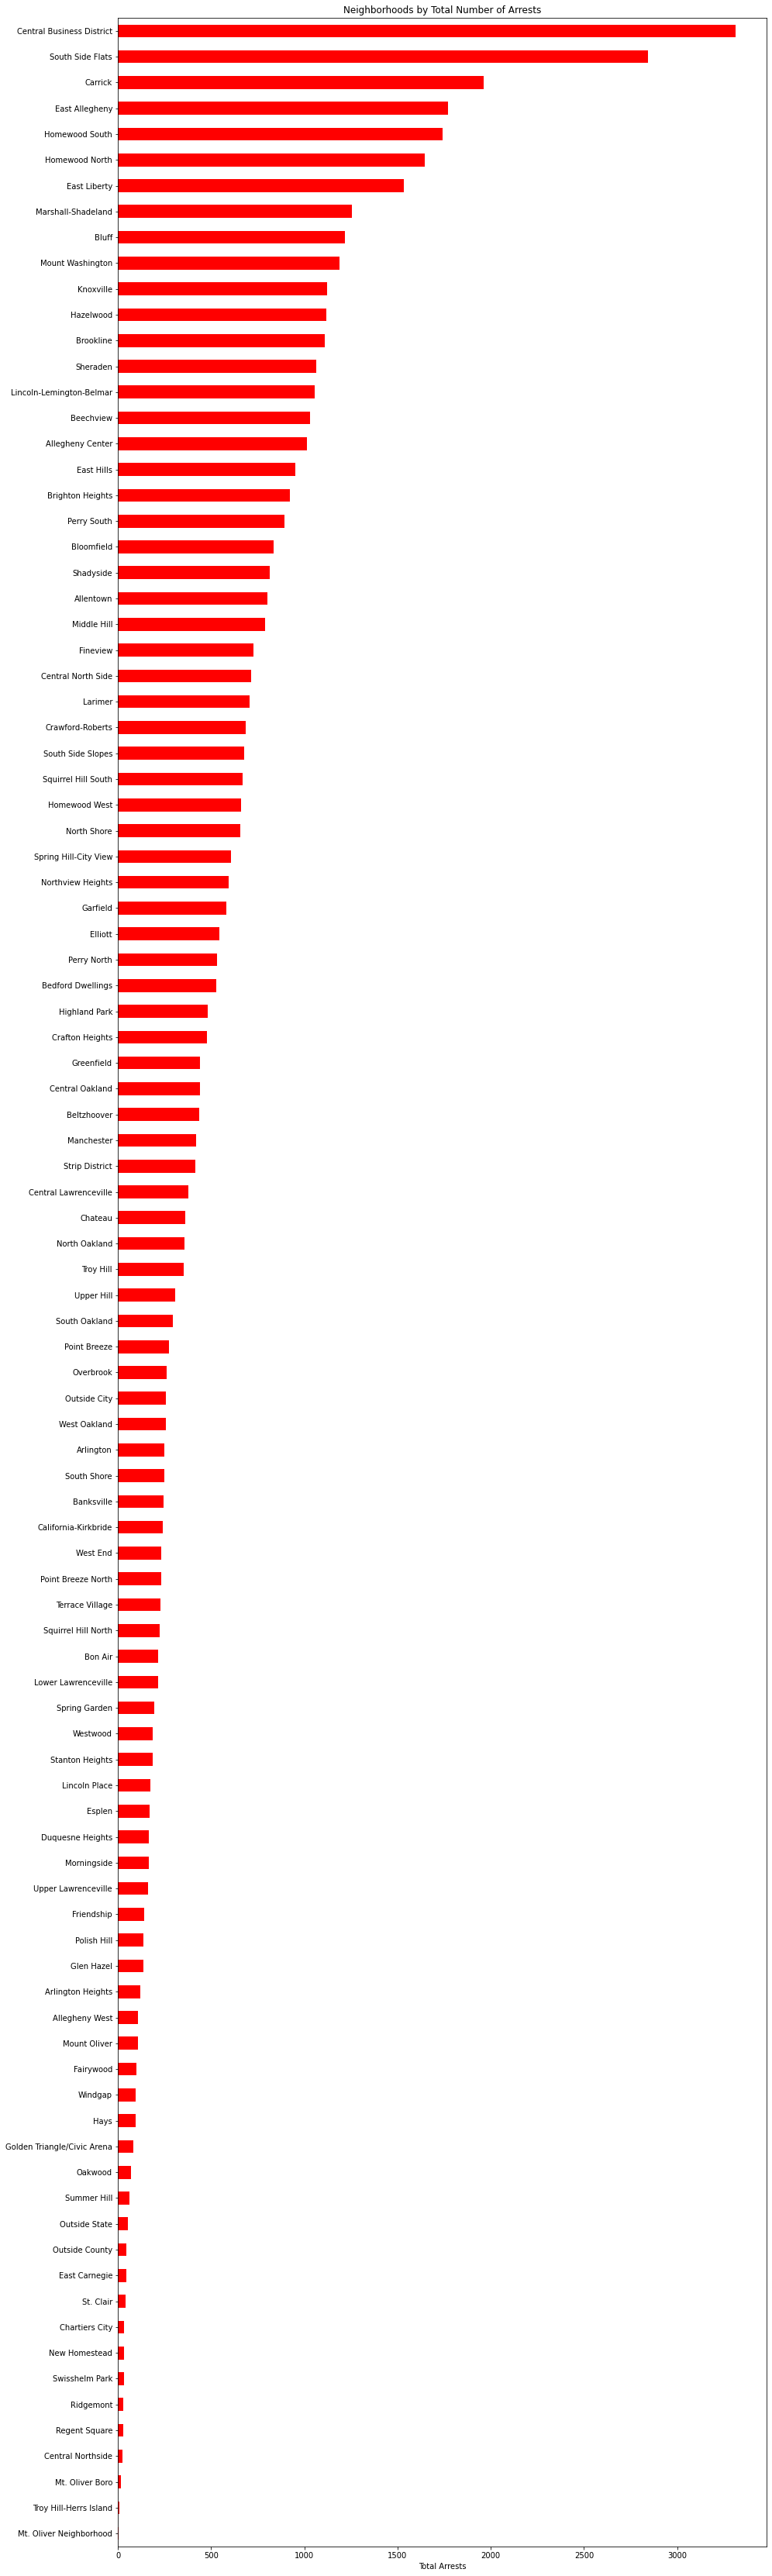

In [16]:
sorted = crime['INCIDENTNEIGHBORHOOD'].value_counts()
sorted.sort_values().plot(kind='barh', figsize=(15,60), color="red")
plt.title("Neighborhoods by Total Number of Arrests")
plt.xlabel("Total Arrests")

#### Note: I, Matt, could not figure out the PANDAS code to conglomerate specific mentions as one bar. We can see some inconsistency in the above graph such as "Mount Oliver", "Mt. Oliver Boro", and "Mt. Oliver Neighborhood" are seperate counts, despite being a singular entity. Same with mentions of "Troy Hill" and "Troy Hill-Herrs Island" in the dataset. Hence, Central Northside has the least amount of arrests.

### Winner by least amount of total arrests:
### Central Northside
#### Matt's Note: Home to the Mexican War Streets, Randyland, and The Mattress Factory, the Central Northside is one of PGH's most beautiful and eclectic neighborhoods. It was blighted by urban decay, gangs, and drugs in the 1990's, but has improved significantly since.

# The TL;DR
#### Joel is a resident of: Central Oakland
#### Matt is a resident of: Bloomfield
#### Joel's favorite PGH neighborhood is: (Joel, add your answer here)
#### Matt's favorite PGH neighborhood is: Polish Hill
### The best neighborhood via the playgrounds metric is: Squirrel Hill South (? Joel, correct this as needed)
### The best neighborhood via the green spaces metric is: East Liberty
### The best neighborhood via the total arrests metric is: Central Northside
### How these three line up via playgrounds: 1) Squirrel Hill South, 2) East Liberty, 3) Central Northside
### How these three line up via green spaces: 1) East Liberty, 2) Squirrel Hill South, 3) Central Northside
### How these three line up via total arrests: 1) Central Northside, 2) Squirrel Hill South, 3) East Liberty
### Point Score: Squirrel Hill South=3+2+2=7, East Liberty=2+3+1=6, Central Northside=1+1+3=5.
## The best neighborhood via all three of our metrics is: SQUIRREL HILL SOUTH.